# KTP database exploration

Testing access to Airtable dataset via the airtable HTTP API. Requires a valid api_token.

https://airtable.com/appQbIS18Qc8GskMC/api/docs#curl/table:quotes:list

Looks like we can only load 100 rows at a time. We need to use pagination and joins to extract all data from the REST API.

https://docs.google.com/presentation/d/1SyLoZid1-M3FXTjwZlmRxaPyBe9iZ1Q0m8T3qdjMKpw/edit

https://vizzuality.blogin.co/single-post.php?id=63837

https://towardsdatascience.com/basic-nlp-on-the-texts-of-harry-potter-sentiment-analysis-1b474b13651d

In [1]:
import getpass
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
api_token = getpass.getpass()

 ·················


In [12]:
url = "https://api.airtable.com/v0/appQbIS18Qc8GskMC/Quotes"

In [13]:
params = {'api_key': api_token}
r = requests.get(url=url, params=params)

In [14]:
tmp = []
for row in r.json().get('records'):
    tmp.append(row.get('fields'))
df = pd.DataFrame(tmp)

In [15]:
len(df)

100

In [16]:
df.head()

,Quotes,Sub-Tags,Platform,Study,Participant,quote_id
0,I started with maps which was ok. I selected c...,"[recqSLy44kvaldDie, rec2dtAU6AQmZRtBp]",[recsT2ijAss13Fi2o],[recL9cedQRzGUKQmN],[recckJBJDSGLsjqOT],123
1,SDGs I knew already. I didn’t know the NDCs ev...,[recPj0UcuXHPsKaHQ],[recGL9hhVifrnrn0c],[recL9cedQRzGUKQmN],[rec5Fxbhf4QwXpFYj],647
2,There seem to be a lot more data. Lots of opti...,[recxhYr8LmVR0KM15],[recz299kfcyPQKWot],[recL9cedQRzGUKQmN],[recIMbEGo8zK1jKMI],782
3,"Global Fishing watch, for 10 minutes, didn’t g...",[recXLs04jMilVhLHA],"[recpljX7elGfy9aVE, recDicfhFnLpNHg5M]",[recL9cedQRzGUKQmN],[rec8TcDFCXfTvTcW1],1359
4,I wanted to see what the mapping is like and i...,"[recqSLy44kvaldDie, rec4agB7NRtMXFffa, recdyax...",[recfbCmz2tnt4H8Zj],[recL9cedQRzGUKQmN],[recbcRmT5X1HBZXTf],328


Interesting, looks like the tags are associated to a uniqe ID, it is that ID that is returned, not the string label of the tags. Will need to create a mapping to the strings in Python.

In [18]:
df.tail()

,Quotes,Sub-Tags,Platform,Study,Participant,quote_id
95,Biodiversity. Country-specific. General data s...,[recThxYCIPwewDP1h],[recz299kfcyPQKWot],[recL9cedQRzGUKQmN],[recwGRtYQCRZyG2Bh],753
96,"these numbers are quite good, three million pl...","[recxhYr8LmVR0KM15, recWgLx9yG38DiTfk, recKueE...",[recDicfhFnLpNHg5M],[recL9cedQRzGUKQmN],[rec5Fxbhf4QwXpFYj],1165
97,I guess the abbreviation here is million tons...,"[recANsXhuaYlIuNsF, reccf1cVYiwjonnhu]",[recGL9hhVifrnrn0c],[recL9cedQRzGUKQmN],[rec5Fxbhf4QwXpFYj],651
98,"there is a lot of information, I like that. ...","[recZXOxoDMbLGhMcl, recD3JEqhaRFNXyAJ]",[recz299kfcyPQKWot],[recL9cedQRzGUKQmN],[rec8TcDFCXfTvTcW1],842
99,We have used these sort of diagrams before to ...,[reccc0V3j2lZjuShl],[recsT2ijAss13Fi2o],[recL9cedQRzGUKQmN],[recYbRdqc4TKVQS1I],9


## Loading data directly

Might be easier just to grab the data directly outside of the API

In [2]:
csv = pd.read_csv("/Users/Ben/Downloads/Quotes-Grid.csv")

In [3]:
csv.head()

,Quotes,quote_id,Sub-Tags,Platform,Study,Participant,Interview,Screen recording
0,Yeah that hummingbirds which I’m still wonderi...,1499,quality,Half Earth,Maddie's study,P24,NaN,NaN
1,I like maps but I found that one quite confusi...,1500,"map,little,overwhelming",Half Earth,Maddie's study,P24,NaN,NaN
2,So what I was hoping it would do would be to b...,1501,"map,layers",Half Earth,Maddie's study,P24,NaN,NaN
3,Also the colours didn't really work or relate ...,1502,"map,colours",Half Earth,Maddie's study,P24,NaN,NaN
4,yeah it just was a bit messy and too much inf...,1503,"overwhelming,demanding",Half Earth,Maddie's study,P24,NaN,NaN


In [4]:
len(csv)

1714

In [5]:
bag_of_tags = []
for tag in csv['Sub-Tags']:
    #print(tag, tag == tag)
    if tag == tag:
        tmp = tag.split(',')
        for item in tmp:
            bag_of_tags.append(item)

In [6]:
# Unique sub-tags
set(bag_of_tags)

{'access',
 'access barrier ',
 'access barrier deterrent',
 'acronyms/abbreviations',
 'animation',
 'appealing',
 'audience specific learning',
 'colours',
 'convincing ',
 'curiosity ',
 'demanding',
 'detailed learning',
 'doubts ',
 'emotional',
 'exciting ',
 'flow diagrams',
 'fun',
 'general learning',
 'globe',
 'graph',
 'guidance',
 'impressive ',
 'interaction',
 'landscape view',
 'latency ',
 'layers',
 'little',
 'map',
 'memorable',
 'meta data/source',
 'more data/ info wanted',
 'navigation',
 'overwhelming',
 'personal',
 'persuasive',
 'photo',
 'quality',
 'ranking ',
 'rarity/richness',
 'science',
 'shocking',
 'static',
 'striking',
 'study time ',
 'surprising',
 'trust ',
 'user experience ',
 'video'}

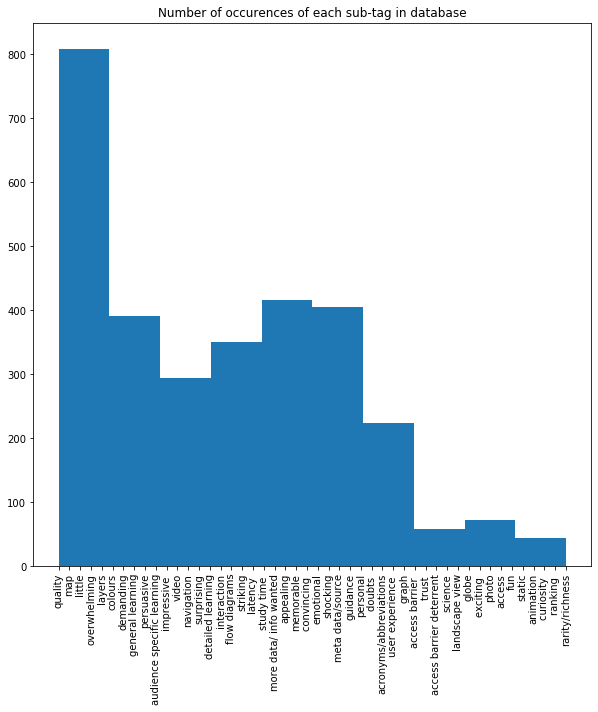

In [7]:
plt.figure(figsize=(10,10))
plt.hist(bag_of_tags)
plt.title("Number of occurences of each sub-tag in database")
_ = plt.xticks(rotation=90)

In [8]:
#!pip install vaderSentiment

In [9]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [10]:
def parse_platform_tag(platform):
    """Nan values are replaced with None"""
    if platform == platform:
        tmp = platform.split(',')
        if 'Exit Interviews' in tmp:
            if len(tmp) == 1:
                return tmp[0]
            #print(tmp)
            tmp = tmp[1]
        else:
            tmp = tmp[0]
        return tmp
    else:
        return None

In [11]:
sentences = {}
analyzer = SentimentIntensityAnalyzer()
for row in range(len(csv)):
    try:
        sentence = csv.iloc[row]['Quotes']
        quote_id = csv.iloc[row]['quote_id']
        platform = parse_platform_tag(csv.iloc[row]['Platform'])
        vs = analyzer.polarity_scores(sentence)
        sentences[quote_id] = {'sentence': sentence, 'vs': vs, 'platform': platform}
    except:
        pass

In [12]:
print(f"extracted senteiment for {len(sentences)} out of {len(csv)} quotes")

extracted senteiment for 1587 out of 1714 quotes


In [13]:
# We can now access each sentence using its quote_id as an index

sentences[1]

{'sentence': 'I learnt that trade flows for commodities are very complex. It seemed to be focused on commodities that result in land use change and deforestation. There was a focus on certain exporter countries. There are lots of companies listed which when navigating through made it difficult. I learnt that certain parts of the world are exporting certain goods and that is having certain impacts. That leads to different chains in the supply and to the countries that ultimately consume. ',
 'vs': {'neg': 0.03, 'neu': 0.838, 'pos': 0.132, 'compound': 0.7579},
 'platform': 'Trase'}

In [14]:
# The unique platforms

all_platforms = []
for row in range(len(csv)):
    all_platforms.append(parse_platform_tag(csv.iloc[row]['Platform']))
    
    
unique_platforms = set(all_platforms)
unique_platforms

{'Climate Watch',
 'Exit Interviews',
 'Global Fishing Watch',
 'Global Forest Watch',
 'Half Earth',
 None,
 'Trase'}

In [15]:
# Calcuate sentiment score across platforms

for platform in unique_platforms:
    if platform and platform is not 'Exit Interviews':
        print(platform)

Global Forest Watch
Climate Watch
Exit Interviews
Trase
Half Earth
Global Fishing Watch


In [16]:
def wc(sentence):
    word_count = len(sentence.split(' '))
    return word_count

In [17]:
#platform

platform_scores = {}
quote_compound_scores = {}

for platform in unique_platforms:
    if platform and platform != 'Exit Interviews':
        print(f"working on {platform}")
        words_per_quote = []
        positive = []
        negative = []
        neutral = []
        compound = []
        for quote_id in sentences:
            if sentences[quote_id].get('platform') == platform:
                #print(sentences[sentence])
                words_per_quote.append(wc(sentences[quote_id].get('sentence')))
                positive.append(sentences[quote_id].get('vs').get('pos'))
                negative.append(sentences[quote_id].get('vs').get('neg'))
                neutral.append(sentences[quote_id].get('vs').get('neu'))
                compound.append(sentences[quote_id].get('vs').get('compound'))
        quote_compound_scores[platform] = compound
        platform_scores[platform] = {   'avg_compound': np.average(compound),
                                        'std_compound': np.std(compound),
                                        'avg_word_count': np.average(words_per_quote),
                                        'std_word_count': np.std(words_per_quote),
                                        'total_words': np.sum(words_per_quote),
                                        'avg_positivity': np.average(positive),
                                        'std_positivity': np.std(positive),
                                        'avg_neutrality': np.average(neutral),
                                        'std_neutrality': np.std(neutral),
                                        'avg_negativity': np.average(negative),
                                        'std_negativity': np.std(neutral)
                                    }

working on Global Forest Watch
working on Climate Watch
working on Trase
working on Half Earth
working on Global Fishing Watch


In [18]:
platform_scores

{'Global Forest Watch': {'avg_compound': 0.3559187692307692,
  'std_compound': 0.44083961205341826,
  'avg_word_count': 40.526153846153846,
  'std_word_count': 29.878679184704353,
  'total_words': 13171,
  'avg_positivity': 0.13374461538461538,
  'std_positivity': 0.1185291369966042,
  'avg_neutrality': 0.8280799999999999,
  'std_neutrality': 0.12177396361860204,
  'avg_negativity': 0.03820923076923077,
  'std_negativity': 0.12177396361860204},
 'Climate Watch': {'avg_compound': 0.28352380952380946,
  'std_compound': 0.4415885823099519,
  'avg_word_count': 40.714285714285715,
  'std_word_count': 28.32424208502782,
  'total_words': 11115,
  'avg_positivity': 0.11286080586080587,
  'std_positivity': 0.1102281468648337,
  'avg_neutrality': 0.8529743589743589,
  'std_neutrality': 0.11469946109509337,
  'avg_negativity': 0.03416483516483517,
  'std_negativity': 0.11469946109509337},
 'Trase': {'avg_compound': 0.25956277372262776,
  'std_compound': 0.4377726013720074,
  'avg_word_count': 45.

In [19]:
platforms = []
word_counts = []
word_counts_sigma = []
total_words = []
for p in platform_scores:
    platforms.append(p)
    word_counts.append(platform_scores[p].get('avg_word_count'))
    word_counts_sigma.append(platform_scores[p].get('std_word_count'))
    total_words.append(platform_scores[p].get('total_words'))

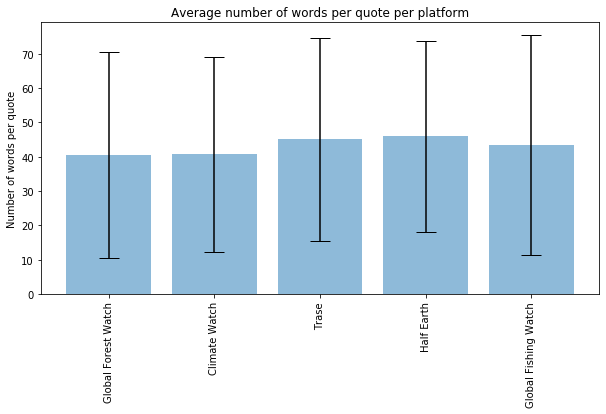

In [20]:
# First a simple analysis, how many words do we have per quote?

plt.figure(figsize=(10,5))
plt.bar(platforms, word_counts,yerr=word_counts_sigma,
           align='center',
           alpha=0.5,
           ecolor='black',
           capsize=10)
plt.title("Average number of words per quote per platform")
plt.ylabel("Number of words per quote")
_ =plt.xticks(rotation=90)

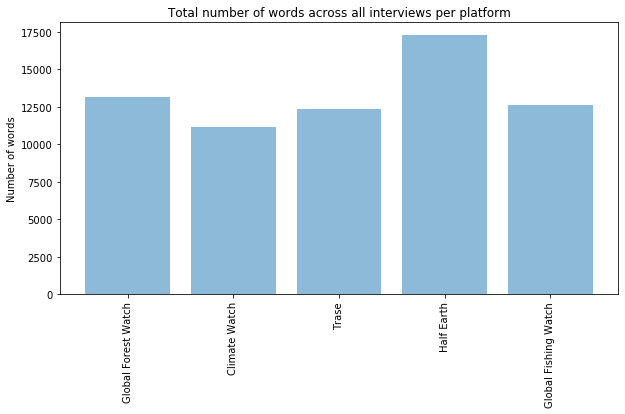

In [21]:
# Next, how many total words per platform?

plt.figure(figsize=(10,5))
plt.bar(platforms, total_words, alpha=0.5)
plt.title("Total number of words across all interviews per platform")
plt.ylabel("Number of words")
_ =plt.xticks(rotation=90)

In [22]:
platform_scores

{'Global Forest Watch': {'avg_compound': 0.3559187692307692,
  'std_compound': 0.44083961205341826,
  'avg_word_count': 40.526153846153846,
  'std_word_count': 29.878679184704353,
  'total_words': 13171,
  'avg_positivity': 0.13374461538461538,
  'std_positivity': 0.1185291369966042,
  'avg_neutrality': 0.8280799999999999,
  'std_neutrality': 0.12177396361860204,
  'avg_negativity': 0.03820923076923077,
  'std_negativity': 0.12177396361860204},
 'Climate Watch': {'avg_compound': 0.28352380952380946,
  'std_compound': 0.4415885823099519,
  'avg_word_count': 40.714285714285715,
  'std_word_count': 28.32424208502782,
  'total_words': 11115,
  'avg_positivity': 0.11286080586080587,
  'std_positivity': 0.1102281468648337,
  'avg_neutrality': 0.8529743589743589,
  'std_neutrality': 0.11469946109509337,
  'avg_negativity': 0.03416483516483517,
  'std_negativity': 0.11469946109509337},
 'Trase': {'avg_compound': 0.25956277372262776,
  'std_compound': 0.4377726013720074,
  'avg_word_count': 45.

In [23]:
platforms = []
positvity = []
positivity_sigma = []
word_counts_sigma = []
neutrality = []
neutrality_sigma = []
negativity = []
negativity_sigma = []
compound = []
compound_sigma = []
for p in platform_scores:
    platforms.append(p)
    compound.append(platform_scores[p].get('avg_compound'))
    compound_sigma.append(platform_scores[p].get('std_compound'))
    positvity.append(platform_scores[p].get('avg_positivity'))
    positivity_sigma.append(platform_scores[p].get('std_positivity'))
    neutrality.append(platform_scores[p].get('avg_neutrality'))
    neutrality_sigma.append(platform_scores[p].get('std_neutrality'))
    negativity.append(platform_scores[p].get('avg_negativity'))
    negativity_sigma.append(platform_scores[p].get('std_negativity'))

In [24]:
platforms

['Global Forest Watch',
 'Climate Watch',
 'Trase',
 'Half Earth',
 'Global Fishing Watch']

In [25]:
data = [quote_compound_scores[plat] for plat in platforms]

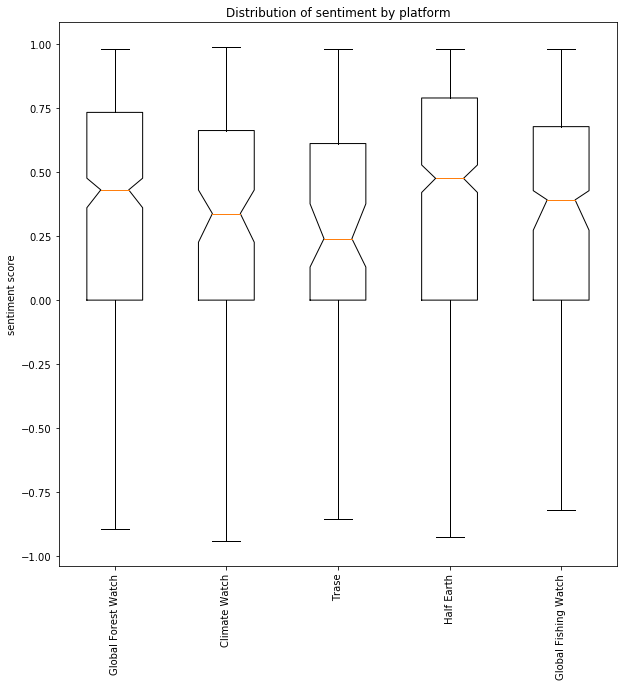

In [26]:
plt.figure(figsize=(10,10))
_= plt.boxplot(data, notch=True, labels= platforms, bootstrap=10000)
_ =plt.xticks(rotation=90)
_ =plt.title('Distribution of sentiment by platform')
_=plt.ylabel("sentiment score")

Ok this is starting to get interesting. Seems that TRASE is least popular by sentiment, followed by climate watch. GFW and Fishing watch seem to have about the same performance, but Half Earth seems to be the platform with the widest spread of sentiment and the highest median sentiment.

### Sentiment broken by positivity 

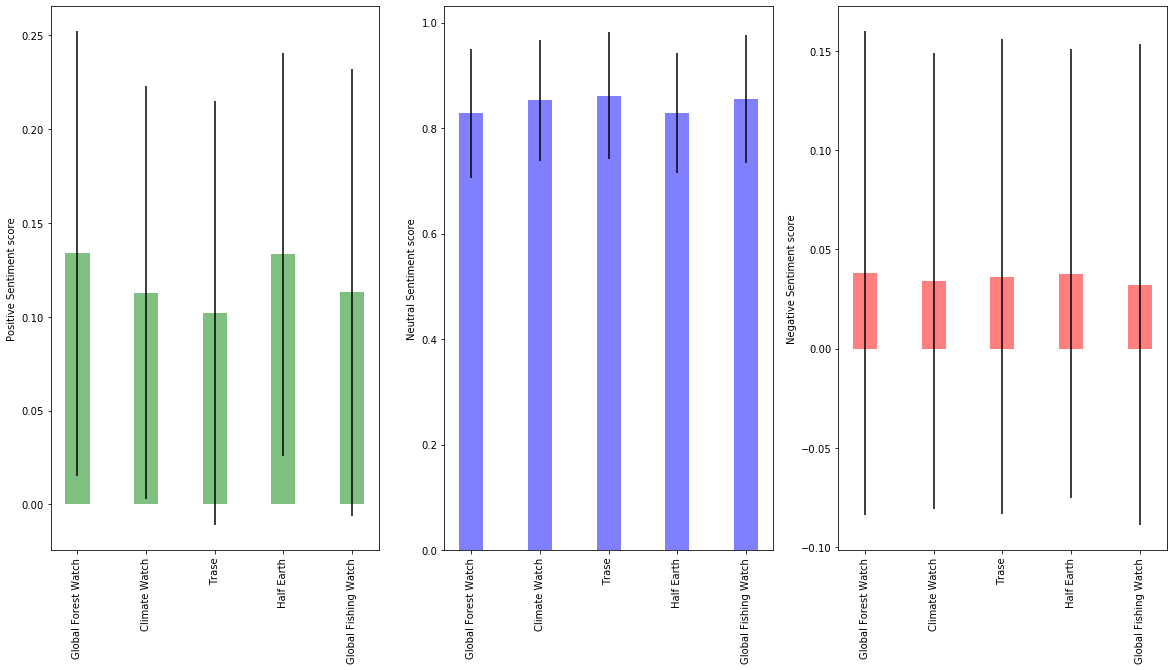

In [27]:

width = 0.35

plt.figure(figsize=(20,10))
plt.title('Sentiment by platform')
plt.subplot(1, 3, 1)
plt.bar(platforms, positvity, width, yerr=positivity_sigma, color='green', alpha=0.5)
plt.ylabel('Positive Sentiment score')
plt.xticks(platforms)
_ =plt.xticks(rotation=90)


plt.subplot(1, 3, 2)
plt.bar(platforms, neutrality, width, yerr=neutrality_sigma, color='blue', alpha=0.5)
plt.ylabel('Neutral Sentiment score')
plt.xticks(platforms)
_ =plt.xticks(rotation=90)


plt.subplot(1, 3, 3)
plt.bar(platforms, negativity, width, yerr=negativity_sigma, color='red', alpha=0.5)
plt.ylabel('Negative Sentiment score')
plt.xticks(platforms)
_ =plt.xticks(rotation=90)


plt.show()

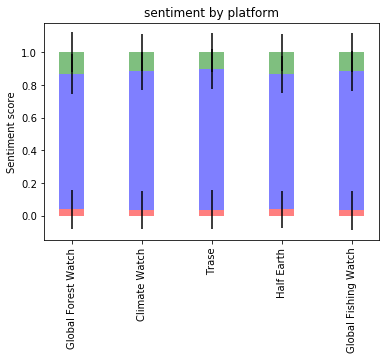

In [28]:
# Viewing the integrated sentiment scores per platform

width = 0.35

p1 = plt.bar(platforms, negativity, width, yerr=negativity_sigma, color='red', alpha=0.5)
p2 = plt.bar(platforms, neutrality, width, yerr=neutrality_sigma, color='blue', alpha=0.5, bottom=negativity)
p3 = plt.bar(platforms, positvity, width, yerr=neutrality_sigma, color='green', alpha=0.5, bottom=np.array(negativity)+np.array(neutrality))

plt.ylabel('Sentiment score')
plt.title('sentiment by platform')
plt.xticks(platforms)
_ =plt.xticks(rotation=90)

plt.show()

Difficult to see any appreciable diffrence. Certainly none at the aggregated level beyond the ±1 standard deviation level. (Although I am not sure if that is meaninfgul or not in this case.)

### Let's start looking at ranking from sentiment and see if it lines up with the self-reported prefrences across the platform

In [29]:
positive_rank = {}
for plat, pos in zip(platforms, positvity):
    positive_rank[plat] = pos

In [30]:
positive_rank

{'Global Forest Watch': 0.13374461538461538,
 'Climate Watch': 0.11286080586080587,
 'Trase': 0.10181021897810219,
 'Half Earth': 0.13334042553191489,
 'Global Fishing Watch': 0.11314776632302406}

In [31]:
import operator

In [32]:
sorted_platforms = sorted(positive_rank.items(), key=operator.itemgetter(1))

In [33]:
# sorted from least positive to most positive
sorted_platforms

[('Trase', 0.10181021897810219),
 ('Climate Watch', 0.11286080586080587),
 ('Global Fishing Watch', 0.11314776632302406),
 ('Half Earth', 0.13334042553191489),
 ('Global Forest Watch', 0.13374461538461538)]

## Break the quotes into primary Emotions

We will be using the [NRC Word-Emotion Association Lexicon aka NRC Emotion Lexicon aka EmoLex](http://sentiment.nrc.ca/lexicons-for-research/), obtained under the [research liscence](http://saifmohammad.com/WebPages/AccessResource.htm).

**Crowdsourcing a Word-Emotion Association Lexicon, Saif Mohammad and Peter Turney, Computational Intelligence, 29 (3), 436-465, 2013**


We will need to:
1. Remove puncutation and tokenize sentences
2. Lemmatize the individual words to return them to the dictionary root ( https://stackabuse.com/python-for-nlp-tokenization-stemming-and-lemmatization-with-spacy-library/ )
3. Lookup the words in the emotion Lexicon and grab the emotion class where given

*nb. need to be on python 3.6 for this library*
```
$ conda install -c conda-forge spacy
$ python -m spacy download en
$ python
import spacy
sp = spacy.load('en_core_web_sm')
```

### todo

We need to create a small dictionary of problematic domain words, for example, when people talk about goods in TRASE that should not be parsed into the Lexical root (good) as it is not talking about an emotion.
Removing the false positives that come from domain specific word roots will increase the signal from people talking about the site itself. Something particularly important when we are dealing with small sample sizes, but that may simply contribute to noise if we were dealing with automatic surveys with thosands of respondants.

In [119]:
from pprint import pprint

In [ ]:
# Load the libs required and config 
import spacy
sp = spacy.load('en_core_web_sm')

In [131]:
# Load the emotion Lexicon
emotions = pd.read_csv("/Users/Ben/Downloads/NRC-Sentiment-Emotion-Lexicons/NRC-Sentiment-Emotion-Lexicons/NRC-Emotion-Lexicon-v0.92/NRC-Emotion-Lexicon-Wordlevel-v0.92.txt",
                      delimiter="	", header=None,names=['word','emotion','e_flag'])
print(f"Loaded {len(emotions):,g} rows of data from the emotion Lexicon")

Loaded 141,820 rows of data from the emotion Lexicon


In [130]:
# example of how words have been tagged in the Lexicon
emotions[emotions['word'] == 'excited']

,word,emotion,e_flag
45400,excited,anger,0
45401,excited,anticipation,1
45402,excited,disgust,0
45403,excited,fear,0
45404,excited,joy,1
45405,excited,negative,0
45406,excited,positive,1
45407,excited,sadness,0
45408,excited,surprise,1
45409,excited,trust,1


In [121]:
def emotion_analysis(text, verbose=False):
    if type(text) != str:
        raise ValueError("emotion_analysis function must be given a string as an input")
    # Lemmatization using spaCy
    emotion_dic = {}
    for word in sp(text):
        #print(word.text, word.lemma_)
        lemma = word.lemma_
        tmp_df = emotions[emotions['word'] == lemma]
        if len(tmp_df) == 10:
            elist = list(tmp_df[tmp_df['e_flag'] == 1]['emotion'].values)
            if len(elist) > 0:
                emotion_dic[lemma] = elist
                if verbose: print(f'✅: {word.text} | {lemma}  |  {elist}')  
            
        else:
            if verbose: print(f"❌: {word.text} | {lemma}")
            tmp_df = None
    if verbose: print(f'Lemmatized: {text}')
    if verbose: pprint(emotion_dic)
    return emotion_dic

In [123]:
# example sentence
text = sentences[1].get('sentence')
d = emotion_analysis(text, verbose=True)

❌: I | -PRON-
✅: learnt | learn  |  ['positive']
❌: that | that
✅: trade | trade  |  ['trust']
✅: flows | flow  |  ['positive']
❌: for | for
✅: commodities | commodity  |  []
❌: are | be
❌: very | very
✅: complex | complex  |  []
❌: . | .
❌: It | -PRON-
❌: seemed | seem
❌: to | to
❌: be | be
✅: focused | focus  |  ['positive']
❌: on | on
✅: commodities | commodity  |  []
❌: that | that
✅: result | result  |  ['anticipation']
❌: in | in
✅: land | land  |  ['positive']
❌: use | use
✅: change | change  |  ['fear']
❌: and | and
❌: deforestation | deforestation
❌: . | .
❌: There | there
❌: was | be
❌: a | a
✅: focus | focus  |  ['positive']
❌: on | on
❌: certain | certain
❌: exporter | exporter
✅: countries | country  |  []
❌: . | .
❌: There | there
❌: are | be
✅: lots | lot  |  []
❌: of | of
✅: companies | company  |  []
✅: listed | list  |  []
❌: which | which
❌: when | when
✅: navigating | navigate  |  []
❌: through | through
✅: made | make  |  []
❌: it | -PRON-
✅: difficult | difficult 

In [127]:
# # Lemmatization using spaCy
# emotion_dic = {}
# for word in sp(sentences[2].get('sentence')):
#     #print(word.text, word.lemma_)
#     lemma = word.lemma_
#     tmp_df = emotions[emotions['word'] == lemma]
#     if len(tmp_df) == 10:
#         elist = list(tmp_df[tmp_df['e_flag'] == 1]['emotion'].values)
#         if len(elist) > 0:
#             emotion_dic[lemma] = elist
#         print(f'✅: {word.text} | {lemma}  |  {elist}')
#     else:
#         print(f"❌: {word.text} | {lemma}")
#         tmp_df = None

In [126]:
# list(tmp_df[tmp_df['e_flag'] == 1]['emotion'].values)

In [125]:
# lemma = 'learn'
# tmp_df = emotions[emotions['word'] == lemma]
# if len(tmp_df) == 10:
#     print(f'✅: {lemma}')
# else
#     print(f"❌ {lemma}")